https://tatoeba.org/zh-cn/

In [6]:
dataset_name = "data/eng2chinese.tsv"

In [7]:
import torch
import torch.nn as nn

# 直接读取
with open(dataset_name, encoding='utf-8') as f:
    lines = f.readlines()
print(lines[:5])

['\ufeff1277\tI have to go to sleep.\t2\t我该去睡觉了。\n', "1280\tToday is June 18th and it is Muiriel's birthday!\t5\t今天是６月１８号，也是Muiriel的生日！\n", '1282\tMuiriel is 20 now.\t7\tMuiriel现在20岁了。\n', '1283\tThe password is "Muiriel".\t8\t密码是"Muiriel"。\n', '1284\tI will be back soon.\t9\t我很快就會回來。\n']


In [8]:
# 只读取有效内容
with open(dataset_name, encoding='utf-8') as f:
    data = []
    for line in f.readlines():
        data.append(line.strip().split('\t')[1]+'\t'+line.strip().split('\t')[3])
print(data[:5])

['I have to go to sleep.\t我该去睡觉了。', "Today is June 18th and it is Muiriel's birthday!\t今天是６月１８号，也是Muiriel的生日！", 'Muiriel is 20 now.\tMuiriel现在20岁了。', 'The password is "Muiriel".\t密码是"Muiriel"。', 'I will be back soon.\t我很快就會回來。']


In [12]:
# 我出特殊字符
import re
import string

content = "".join(data)
special_char = re.sub(r'[\u4e00-\u9fa5]', '', content)  # 匹配中文，将中文替换掉

print(set(special_char) - set(string.ascii_letters) - set(string.digits))

{'＂', '「', '\xad', 'ì', '$', '𣬠', '１', '→', '’', '》', 'ã', '\u3000', '；', 'ù', 'Ｑ', '︀', '\u202f', ' ', '〇', 'ń', '３', 'ß', '·', 'ö', '⋯', '─', '‐', 'あ', '？', 'Ü', '﹐', 'è', 'ō', 'ę', '€', 'á', '–', "'", 'α', 'ç', '(', '+', '\t', '𣬶', '?', '‧', '６', '‘', '»', '•', 'é', 'í', 'ü', '°', '）', '：', '-', '₣', '０', 'ā', '/', '。', 'ł', '！', '«', '﹣', '%', 'ǎ', 'β', '@', 'ū', '～', '」', '５', '”', ')', '—', 'ī', '\u200b', '％', '《', '!', '』', 'ó', '…', '（', ',', '[', 'ò', ':', '.', '『', ';', '_', '"', '，', '☭', '“', '８', '、', '&', 'а', ']', 'à', 'ï', '－'}


In [13]:
def cleaning(data):
    for i in range(len(data)):
        # 替换特殊字符
        data[i] = data[i].replace('\u200b', '')
        data[i] = data[i].replace('\u200f', '')
        data[i] = data[i].replace('\xad', '')
        data[i] = data[i].replace('\u3000', ' ')
        eng_mark = [',', '.', '!', '?']  # 因为标点前加空格
        for mark in eng_mark:
            data[i] = data[i].replace(mark, ' '+mark)
        data[i] = data[i].lower()  # 统一替换为小写
    return data

In [34]:
cleaning(data)[:5]

['i have to go to sleep  .\t我该去睡觉了。',
 "today is june 18th and it is muiriel's birthday  !\t今天是６月１８号，也是muiriel的生日！",
 'muiriel is 20 now  .\tmuiriel现在20岁了。',
 'the password is "muiriel"  .\t密码是"muiriel"。',
 'i will be back soon  .\t我很快就會回來。']

In [15]:
def tokenize(data):
    # 分别存储源语言和目标语言的词元
    src_tokens, tgt_tokens = [], []
    for line in data:
        pair = line.split('\t')
        src = pair[0].split(' ')
        tgt = list(pair[1])
        src_tokens.append(src)
        tgt_tokens.append(tgt)
    return src_tokens, tgt_tokens

src_tokens, tgt_tokens = tokenize(data)
print("src:", src_tokens[:6])
print("tgt:", tgt_tokens[:6])

src: [['i', 'have', 'to', 'go', 'to', 'sleep', '.'], ['today', 'is', 'june', '18th', 'and', 'it', 'is', "muiriel's", 'birthday', '!'], ['muiriel', 'is', '20', 'now', '.'], ['the', 'password', 'is', '"muiriel"', '.'], ['i', 'will', 'be', 'back', 'soon', '.'], ["i'm", 'at', 'a', 'loss', 'for', 'words', '.']]
tgt: [['我', '该', '去', '睡', '觉', '了', '。'], ['今', '天', '是', '６', '月', '１', '８', '号', '，', '也', '是', 'm', 'u', 'i', 'r', 'i', 'e', 'l', '的', '生', '日', '！'], ['m', 'u', 'i', 'r', 'i', 'e', 'l', '现', '在', '2', '0', '岁', '了', '。'], ['密', '码', '是', '"', 'm', 'u', 'i', 'r', 'i', 'e', 'l', '"', '。'], ['我', '很', '快', '就', '會', '回', '來', '。'], ['我', '不', '知', '道', '應', '該', '說', '什', '麼', '才', '好', '。']]


In [16]:
import numpy as np

def statistics(tokens):
    max_len = 80  # 只统计长度80以下的
    len_list = range(max_len)  # 长度值
    freq_list = np.zeros(max_len)  # 频率值
    for token in tokens:
        if len(token) < max_len:
            freq_list[len_list.index(len(token))] += 1
    return len_list, freq_list

s1, s2 = statistics(src_tokens)
t1, t2 = statistics(tgt_tokens)

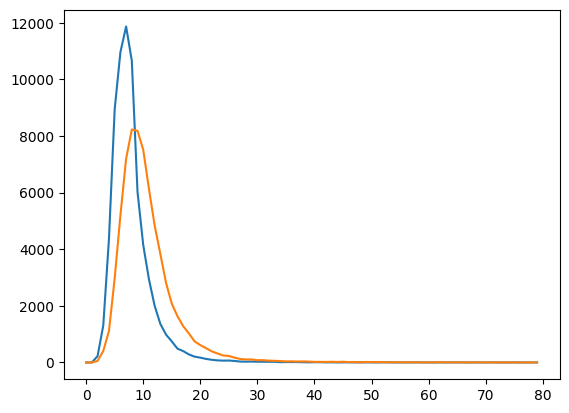

In [17]:
import matplotlib.pyplot as plt
plt.plot(s1, s2)
plt.plot(t1, t2)

In [20]:
from collections import Counter  #计数类

flatten = lambda l: [item for sublist in l for item in sublist]  #展平数组

# 构建词表
class Vocab:
    def __init__(self, tokens):
        self.tokens = tokens  # 传入的tokens是二维列表
        self.token2index = {'<bos>': 0, '<eos>': 1, '<unk>': 2, '<pad>': 3}  # 先存好特殊词元
        # 将词元按词频排序后生成列表
        self.token2index.update({
            token: index + 4
            for index, (token, freq) in enumerate(
                sorted(Counter(flatten(self.tokens)).items(), key=lambda x: x[1], reverse=True)
            )
        })
        #构建id到词元字典
        self.index2token = {index: token for token, index in self.token2index.items()}

    def __getitem__(self, query):
        # 单一索引
        if isinstance(query, (str, int)):
            if isinstance(query, str):
                return self.token2index.get(query, 0)
            elif isinstance(query, (int)):
                return self.index2token.get(query, '<unk>')
        # 数组索引
        elif isinstance(query, (list, tuple)):
            return [self.__getitem__(item) for item in query]
            
    def __len__(self):
        return len(self.index2token)

In [21]:
from torch.utils.data import DataLoader, TensorDataset

seq_len = 48  # 序列最大长度

# 对数据按照最大长度进行截断和填充
def padding(tokens, seq_len):
    # 该函数对单个句子进行处理
    # 传入的句子是词元形式
    return tokens[:seq_len] if len(tokens) > seq_len else tokens + ['<pad>'] * (seq_len - len(tokens))

#实例化source和target词表
src_vocab, tgt_vocab = Vocab(src_tokens), Vocab(tgt_tokens)

#增加结尾标识<eos>
src_data = torch.tensor([src_vocab[padding(line + ['<eos>'], seq_len)] for line in src_tokens])
tgt_data = torch.tensor([tgt_vocab[padding(line + ['<eos>'], seq_len)] for line in tgt_tokens])

In [36]:
src_data[:3],tgt_data[:3]

(tensor([[   6,   21,    7,   47,    7,  347,    4,    1,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3],
         [ 124,   10, 1741, 5719,   28,   20,   10, 6804,  624,   43,    1,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3],
         [4319,   10, 1443,   90,    4,    1,    3,    3,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
             3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3]]),
 tensor([[ 

In [28]:
# 训练集和测试集比例化8:2, batch_size = 16
train_size = int(len(src_data) * 0.8)
test_size = len(src_data) - train_size
batch_size = 512
train_loader = DataLoader(TensorDataset(src_data[:train_size], tgt_data[:train_size]), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(src_data[-test_size:], tgt_data[-test_size:]), batch_size=1)

In [29]:
# 定义编码器
class Encoder(nn.Module):
    def __init__(self, vocab_size, ebd_size, hidden_size, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, ebd_size, padding_idx=3)  # 将token表示为embedding
        self.gru = nn.GRU(ebd_size, hidden_size, num_layers=num_layers)

    def forward(self, encoder_inputs):
        # encoder_inputs从(batch_size, seq_len)变成(batch_size, seq_len, emb_size)再调整为(seq_len, batch_size, emb_size)
        encoder_inputs = self.embedding(encoder_inputs).permute(1, 0, 2)
        output, hidden = self.gru(encoder_inputs)
        # hidden 的形状为 (num_layers, batch_size, hidden_size)
        # 最后时刻的最后一个隐层的输出的隐状态即为上下文向量
        return hidden

# 定义解码器
class Decoder(nn.Module):
    def __init__(self, vocab_size, ebd_size, hidden_size, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, ebd_size, padding_idx=3)
        # 拼接维度ebd_size + hidden_size
        self.gru = nn.GRU(ebd_size + hidden_size, hidden_size, num_layers=num_layers)
        self.linear = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, decoder_inputs, encoder_states):
        '''
        decoder_inputs 为目标序列偏移一位的结果，由初始形状: (batch_size, seq_len)变为(batch_size, seq_len)
        再调整为(batch_size, seq_len, emb_size) -> (seq_len, batch_size, emb_size)
        '''
        decoder_inputs = self.embedding(decoder_inputs).permute(1, 0, 2)
        context = encoder_states[-1] # 上下文向量取编码器的最后一个隐层的输出
        # context 初始形状为 (batch_size, hidden_size)，为下一步连接，需repeat为(seq_len, batch_size, hidden_size)
        context = context.repeat(decoder_inputs.shape[0], 1, 1)
        output, hidden = self.gru(torch.cat((decoder_inputs, context), -1), encoder_states)
        # logits 的形状为 (seq_len, batch_size, vocab_size)
        logits = self.linear(output)
        return logits, hidden

# seq2seq模型
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, encoder_inputs, decoder_inputs):
        return self.decoder(decoder_inputs, self.encoder(encoder_inputs))

In [32]:
from tqdm import *
import matplotlib.pyplot as plt

# 设置是否使用GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 设置超参数
lr = 0.001
num_epochs = 100
hidden_size = 256

# 建立模型
encoder = Encoder(len(src_vocab), len(src_vocab), hidden_size, num_layers=2)
decoder = Decoder(len(tgt_vocab), len(tgt_vocab), hidden_size, num_layers=2)
model = Seq2Seq(encoder, decoder)
model.to(device)

# 交叉熵损失和adam优化器
criterion = nn.CrossEntropyLoss(reduction='none', ignore_index=3)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


In [33]:
# 记录损失变化
loss_history = []

# 记录损失变化
loss_history = []

#开始训练
model.train()
for epoch in tqdm(range(num_epochs)):
    for encoder_inputs, decoder_targets in train_loader:
        encoder_inputs, decoder_targets = encoder_inputs.to(device), decoder_targets.to(device)
        # 偏移一位作为decoder的输入
        # decoder的输入第一位是<bos>
        # decoder_targets.shape[0]就是batch_size
        bos_column = torch.tensor([tgt_vocab['<bos>']] * decoder_targets.shape[0]).reshape(-1, 1).to(device)
        decoder_inputs = torch.cat((bos_column, decoder_targets[:, :-1]), dim=1)
        # pred的形状为 (seq_len, batch_size, vocab_size)
        pred, _ = model(encoder_inputs, decoder_inputs)
        # decoder_targets 的形状为 (batch_size, seq_len), 我们需要改变pred的形状以保证它能被正确输入
        # loss 的形状为 (batch_size, seq_len), 其中的每个元素都代表了一个词元的损失
        # 交叉熵损失计算预测分布和实际分布之间的差异，L = -log(p_t)
        loss = criterion(pred.permute(1, 2, 0), decoder_targets).mean()
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    if epoch % 5 == 0:
        print(f"loss = {loss_history[-1]}")

  1%|▌                                                         | 1/100 [00:11<18:32, 11.24s/it]

loss = 0.965741753578186


  6%|███▍                                                      | 6/100 [01:07<17:38, 11.26s/it]

loss = 0.5568394064903259


 11%|██████▎                                                  | 11/100 [02:04<16:43, 11.27s/it]

loss = 0.41161516308784485


 16%|█████████                                                | 16/100 [03:00<15:47, 11.28s/it]

loss = 0.328755259513855


 21%|███████████▉                                             | 21/100 [03:57<14:51, 11.29s/it]

loss = 0.2667121887207031


 26%|██████████████▊                                          | 26/100 [04:53<13:56, 11.30s/it]

loss = 0.2217564731836319


 31%|█████████████████▋                                       | 31/100 [05:50<13:01, 11.33s/it]

loss = 0.18787501752376556


 36%|████████████████████▌                                    | 36/100 [06:46<12:01, 11.27s/it]

loss = 0.1652941107749939


 41%|███████████████████████▎                                 | 41/100 [07:43<11:05, 11.29s/it]

loss = 0.15111447870731354


 46%|██████████████████████████▏                              | 46/100 [08:39<10:10, 11.30s/it]

loss = 0.13365893065929413


 51%|█████████████████████████████                            | 51/100 [09:35<09:12, 11.27s/it]

loss = 0.12206161022186279


 56%|███████████████████████████████▉                         | 56/100 [10:32<08:16, 11.28s/it]

loss = 0.11271842569112778


 61%|██████████████████████████████████▊                      | 61/100 [11:28<07:19, 11.28s/it]

loss = 0.10499294102191925


 66%|█████████████████████████████████████▌                   | 66/100 [12:25<06:23, 11.28s/it]

loss = 0.09498786926269531


 71%|████████████████████████████████████████▍                | 71/100 [13:21<05:27, 11.28s/it]

loss = 0.08591657876968384


 76%|███████████████████████████████████████████▎             | 76/100 [14:18<04:30, 11.28s/it]

loss = 0.08433974534273148


 81%|██████████████████████████████████████████████▏          | 81/100 [15:14<03:34, 11.28s/it]

loss = 0.08123445510864258


 86%|█████████████████████████████████████████████████        | 86/100 [16:11<02:38, 11.30s/it]

loss = 0.07892081141471863


 91%|███████████████████████████████████████████████████▊     | 91/100 [17:08<01:41, 11.33s/it]

loss = 0.07480420172214508


 96%|██████████████████████████████████████████████████████▋  | 96/100 [18:04<00:45, 11.33s/it]

loss = 0.07177222520112991


100%|████████████████████████████████████████████████████████| 100/100 [18:49<00:00, 11.30s/it]


Text(0, 0.5, 'train loss')

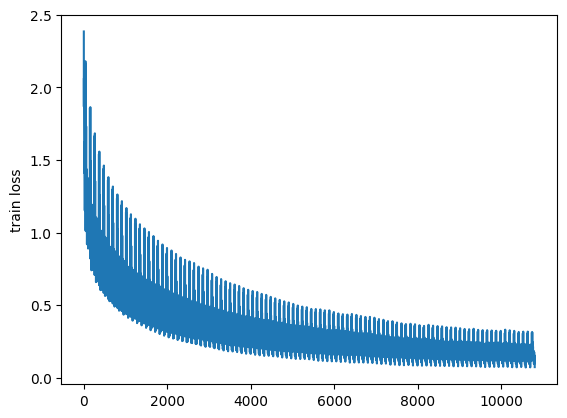

In [37]:
plt.plot(loss_history)
plt.ylabel("train loss")

In [38]:
torch.save(model.state_dict(), 'eng2chinese.pt')

In [39]:
import math
# 计算bleu分数
def bleu(label, pred, n):
    score = math.exp(min(0, 1 - len(label) / len(pred)))
    for k in range(1, n + 1):
        num_matches = 0
        hashtable = Counter([' '.join(label[i:i + k]) for i in range(len(label) - k + 1)])
        for i in range(len(pred) - k + 1):
            ngram = ' '.join(pred[i:i + k])
            if ngram in hashtable and hashtable[ngram] > 0:
                num_matches += 1
                hashtable[ngram] -= 1
        score *= pow(num_matches / (len(pred) - k + 1), pow(0.5, k))
    return score

In [41]:
model.eval()
translation_results = []
bleu_scores = []
# 因为batch_size是1，所以每次取出来的都是单个句子
for src_seq, tgt_seq in test_loader:
    encoder_inputs = src_seq
    hidden = model.encoder(encoder_inputs.to(device))
    pred_seq = [tgt_vocab['<bos>']]
    for _ in range(8):
        # 一步步输出，decoder的输入的形状为(batch_size, seq_len)=(1, 1)
        decoder_inputs = torch.tensor(pred_seq[-1]).reshape(1, 1).to(device)
        # pred形状为 (seq_len, batch_size, vocab_size) = (1, 1, vocab_size)
        pred, hidden = model.decoder(decoder_inputs, hidden)
        next_token_index = pred.squeeze().argmax().item()
        if next_token_index == tgt_vocab['<eos>']:
            break
        pred_seq.append(next_token_index)

    # 去掉开头的<bos>
    pred_seq = tgt_vocab[pred_seq[1:]]
    # 因为tgt_seq的形状为(1, seq_len)，我们需要将其转化成(seq_len,)的形状
    tgt_seq = tgt_seq.squeeze().tolist()
    
    # 需要注意在<eos>之前截断
    if tgt_vocab['<eos>'] in tgt_seq:
        eos_idx = tgt_seq.index(tgt_vocab['<eos>'])
        tgt_seq = tgt_vocab[tgt_seq[:eos_idx]]
    else:
        tgt_seq = tgt_vocab[tgt_seq]
    translation_results.append((' '.join(tgt_seq), ' '.join(pred_seq)))
    bleu_scores.append(bleu(tgt_seq, pred_seq, n=2))

In [42]:
print(sum(bleu_scores) / test_size)

0.1458992241572457


In [45]:
translation_results[:10]

[('我 想 在 买 之 前 先 试 试 这 个 新 机 型 。', '我 想 要 呼 吸 這 筆 賣'),
 ('汤 姆 希 望 玛 丽 不 会 跟 约 翰 谈 恋 爱 。', '汤 姆 不 喜 欢 做 法 是'),
 ('我 想 给 我 朋 友 选 个 礼 物 。', '我 想 一 想 看 我 有 十'),
 ('在 第 一 个 信 号 灯 处 右 转 。', '在 慢 地 下 五 点 左 右'),
 ('我 们 上 周 去 了 海 滩 。', '我 们 一 周 日 要 做 人'),
 ('汤 姆 经 常 在 课 堂 上 睡 着 。', '汤 姆 经 常 在 家 里 吗'),
 ('你 们 在 巴 黎 看 到 了 什 么 ？', '你 在 哪 里 找 到 车 子'),
 ('你 什 么 时 候 试 着 抱 过 汤 姆 ？', '你 什 麼 時 候 要 結 束'),
 ('有 什 么 你 想 让 我 买 的 吗 ？', '有 什 么 卡 车 会 可 以'),
 ('他 写 得 很 匆 忙 。', '他 用 淺 顯 的 文 件 夹')]